**TITLE** 

PARTIAL LEAST SQUARE REGRESSION FOR MEATS DATASET TO PREDICT THE CONTENT OF FAT IN EACH OF THE SAMPLE OF MEAT

**INTRODUCTION**

*Partial Least Squares against multicollinearity*

The goal of Linear Regression is to model the dependence relationship between one dependent (target) variable and multiple independent (explanatory) variables. Ordinary Least Squares works great for this, as long as we meet the assumptions of Linear Regression.

In some domains, it may happen that we have a lot of independent variables in our model, of which many are correlated with other independent variables. If this happens, we can get into trouble if we use OLS: we will have multicollinearity and therefore violate the assumptions of Linear Regression.

Partial Least Squares is a solution for this case: it allows us to reduce the dimensionality of correlated variables and model the underlying, shared, information of those variables (in both dependent and independent variables).

*Partial Least Squares for multivariate outcome*

A second large advantage of Partial Least Squares is that it is a method that can model multiple outcome variables. Many statistics and Machine Learning models cannot deal directly with multiple outcome variables.

Solutions can often be found for those models. For instance, building one model per variable. Yet especially for analytical use cases, it can be essential to keep everything in one model, as the interpretation of one multivariate model will be different from the interpretation of many univariate models. PLS helps us model multiple independent variables to explain multiple dependent variables in presence of multicolinearity.

PLS method considers least square estimation. This technique  helps us to reduce dimesnsion and hence minimising the multicolinearity problem.

**PROBLEM**

Q1) Identify a suitable dependent variable and appropriate predictor variables.

Q2) Construct a regression model for the dependent variable by PLS.

Here, in this analysis we are taking fat content as the suitable dependent variable to be predicted.

**OBJECTIVES**

Our main objective is to build a partialleast square regression model to predict the content of fat in the given samples of meat.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing various modules required for modelling
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression

#Loading the functions required for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

**DATA DESCRIPTION**

These data are recorded on a Tecator Infratec Food and Feed Analyzer working in the wavelength range 850 - 1050 nm by the Near Infrared Transmission (NIT) principle. Each sample contains finely chopped pure meat with different moisture, fat and protein contents.

For each meat sample the data consists of a 100 channel spectrum of
absorbances and the contents of moisture (water), fat and protein. The absorbance is -log10 of the transmittance measured by the spectrometer. The three contents, measured in percent, are determined by analytic chemistry.

The goal of the meats data is to take 100 automated Near-Infrared measurements of meat and use them to predict the fat content of the meat.

In [ ]:
#Loading the required dataset.
meat=pd.read_excel("/content/meats.xlsx")
meat=pd.DataFrame(meat)

#Viewing 'meat' data set.
meat

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,x_011,x_012,x_013,x_014,x_015,x_016,x_017,x_018,x_019,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028,x_029,x_030,x_031,x_032,x_033,x_034,x_035,x_036,x_037,x_038,x_039,x_040,...,x_064,x_065,x_066,x_067,x_068,x_069,x_070,x_071,x_072,x_073,x_074,x_075,x_076,x_077,x_078,x_079,x_080,x_081,x_082,x_083,x_084,x_085,x_086,x_087,x_088,x_089,x_090,x_091,x_092,x_093,x_094,x_095,x_096,x_097,x_098,x_099,x_100,water,fat,protein
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,2.62964,2.63245,2.63565,2.63933,2.64353,2.64825,2.65350,2.65937,2.66585,2.67281,2.68008,2.68733,2.69427,2.70073,2.70684,2.71281,2.71914,2.72628,2.73462,2.74416,2.75466,2.76568,2.77679,2.78790,2.79949,2.81225,2.82706,2.84356,2.86106,2.87857,...,3.39418,3.39490,3.39366,3.39045,3.38541,3.37869,3.37041,3.36073,3.34979,3.33769,3.32443,3.31013,3.29487,3.27891,3.26232,3.24542,3.22828,3.21080,3.19287,3.17433,3.15503,3.13475,3.11339,3.09116,3.06850,3.04596,3.02393,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,60.5,22.5,16.7
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,2.88264,2.88898,2.89577,2.90308,2.91097,2.91953,2.92873,2.93863,2.94929,2.96072,2.97272,2.98493,2.99690,3.00833,3.01920,3.02990,3.04101,3.05345,3.06777,3.08416,3.10221,3.12106,3.13983,3.15810,3.17623,3.19519,3.21584,3.23747,3.25889,3.27835,...,3.56045,3.56034,3.55876,3.55571,3.55132,3.54585,3.53950,3.53235,3.52442,3.51583,3.50668,3.49700,3.48683,3.47626,3.46552,3.45501,3.44481,3.43477,3.42465,3.41419,3.40303,3.39082,3.37731,3.36265,3.34745,3.33245,3.31818,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,46.0,40.1,13.5
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,2.60414,2.60714,2.61029,2.61361,2.61714,2.62089,2.62486,2.62909,2.63361,2.63835,2.64330,2.64838,2.65354,2.65870,2.66375,2.66880,2.67383,2.67892,2.68411,2.68937,2.69470,2.70012,2.70563,2.71141,2.71775,2.72490,2.73344,2.74327,2.75433,2.76642,...,3.18039,3.17411,3.16611,3.15641,3.14512,3.13241,3.11843,3.10329,3.08714,3.07014,3.05237,3.03393,3.01504,2.99569,2.97612,2.95642,2.93660,2.91667,2.89655,2.87622,2.85563,2.83474,2.81361,2.79235,2.77113,2.75015,2.72956,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,71.0,8.4,20.5
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,2.84374,2.84664,2.84975,2.85307,2.85661,2.86038,2.86437,2.86860,2.87308,2.87789,2.88301,2.88832,2.89374,2.89917,2.90457,2.90991,2.91521,2.92043,2.92565,2.93082,2.93604,2.94128,2.94658,2.95202,2.95777,2.96419,2.97159,2.98045,2.99090,3.00284,...,3.51036,3.50682,3.50140,3.49398,3.48457,3.47333,3.46041,3.44595,3.43005,3.41285,3.39450,3.37511,3.35482,3.33376,3.31204,3.28986,3.26730,3.24442,3.22117,3.19757,3.17357,3.14915,3.12429,3.09908,3.07366,3.04825,3.02308,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,72.8,5.9,20.7
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,2.81272,2.81704,2.82184,2.82710,2.83294,2.83945,2.84664,2.85458,2.86331,2.87280,2.88291,2.89335,2.90374,2.91371,2.92305,2.93187,2.94060,2.94986,2.96035,2.97241,2.98606,3.00097,3.01652,3.03220,3.04793,3.06413,3.08153,3.10078,3.12185,3.14371,...,3.74357,3.74453,3.74336,3.73991,3.73418,3.72638,3.71676,3.70553,3.69289,3.67900,3.66396,3.64785,3.63085,3.61305,3.59463,3.57582,3.55695,3.53796,3.51880,3.49936,3.47938,3.45869,3.43711,3.41458,3.39129,3.36772,3.34450,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,58.3,25.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
meat.shape

(215, 103)

It is observed that the dataset comprises of 215 records and 103 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 103 entries, x_001 to protein
dtypes: float64(103)
memory usage: 173.1 KB


From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
meat.describe()

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,x_011,x_012,x_013,x_014,x_015,x_016,x_017,x_018,x_019,x_020,x_021,x_022,x_023,x_024,x_025,x_026,x_027,x_028,x_029,x_030,x_031,x_032,x_033,x_034,x_035,x_036,x_037,x_038,x_039,x_040,...,x_064,x_065,x_066,x_067,x_068,x_069,x_070,x_071,x_072,x_073,x_074,x_075,x_076,x_077,x_078,x_079,x_080,x_081,x_082,x_083,x_084,x_085,x_086,x_087,x_088,x_089,x_090,x_091,x_092,x_093,x_094,x_095,x_096,x_097,x_098,x_099,x_100,water,fat,protein
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,2.839957,2.844390,2.849152,2.854288,2.859844,2.865844,2.872291,2.879244,2.886728,2.894691,2.902986,2.911358,2.919562,2.927454,2.935059,2.942558,2.950275,2.958583,2.967758,2.977881,2.988772,3.000071,3.011461,3.022919,3.034826,3.047814,3.062523,3.078830,3.096211,3.113879,...,3.623836,3.622136,3.618438,3.612758,3.605205,3.595975,3.585247,3.573175,3.559896,3.545537,3.530208,3.513990,3.496981,3.479365,3.461379,3.443216,3.424906,3.406406,3.387609,3.368399,3.348625,3.328123,3.306856,3.284976,3.262852,3.240918,3.219482,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,63.204419,18.142326,17.682791
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,0.436906,0.439653,0.442446,0.445303,0.448239,0.451257,0.454356,0.457546,0.460843,0.464272,0.467797,0.471355,0.474864,0.478260,0.481541,0.484774,0.488073,0.491629,0.495564,0.499945,0.504694,0.509635,0.514550,0.519277,0.523824,0.528329,0.532875,0.537384,0.541553,0.544953,...,0.545177,0.545499,0.545687,0.545771,0.545746,0.545690,0.545600,0.545468,0.545309,0.545167,0.545045,0.544887,0.544649,0.544448,0.544290,0.544269,0.544326,0.544481,0.544677,0.544868,0.544988,0.544925,0.544640,0.544125,0.543489,0.542884,0.542428,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,9.902692,12.740297,3.016687
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,2.063470,2.063870,2.064340,2.064930,2.065720,2.066730,2.067940,2.069370,2.070920,2.072770,2.074890,2.077180,2.079520,2.081840,2.084160,2.086460,2.088710,2.090840,2.092890,2.094780,2.096610,2.098490,2.100660,2.103470,2.107220,2.112240,2.119080,2.127810,2.138550,2.151380,...,2.734560,2.734880,2.733350,2.729970,2.724810,2.717970,2.709590,2.699810,2.688760,2.676590,2.663350,2.649210,2.634220,2.618520,2.602270,2.585620,2.568600,2.551130,2.533260,2.514900,2.496060,2.476820,2.457260,2.437480,2.417610,2.397800,2.378180,2.358810,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,39.300000,0.900000,11.000000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,2.524025,2.526675,2.529485,2.532475,2.535605,2.538925,2.542620,2.546855,2.551410,2.556250,2.562735,2.569550,2.576170,2.581215,2.585820,2.590395,2.596330,2.603270,2.609525,2.614090,2.618745,2.625315,2.635035,2.647765,2.660685,2.672465,2.685140,2.699430,2.712650,2.727160,...,3.233310,3.229220,3.223150,3.215215,3.205525,3.197825,3.186070,3.1

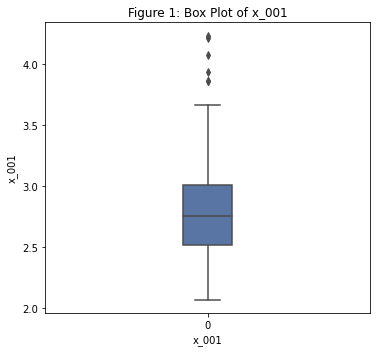

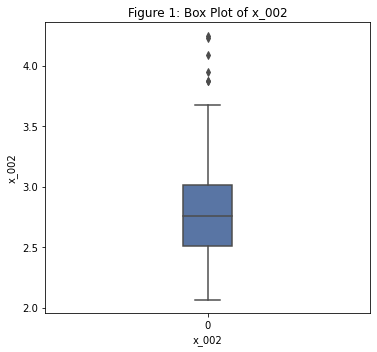

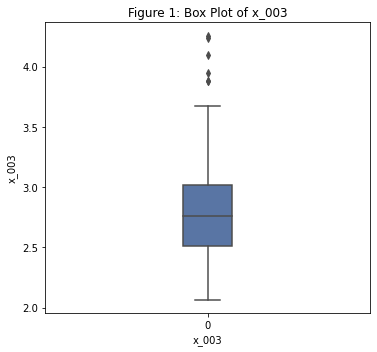

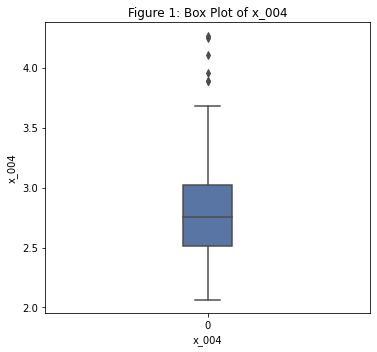

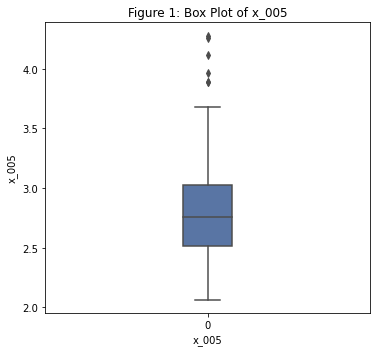

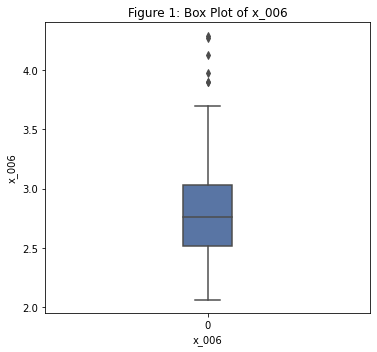

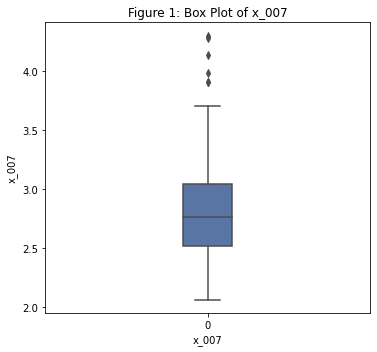

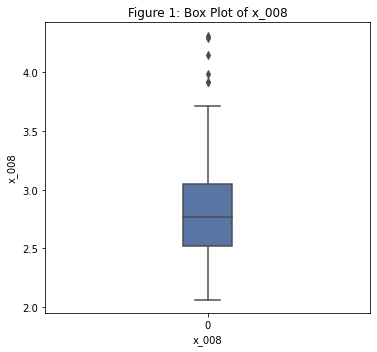

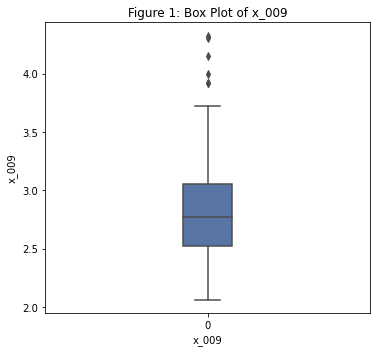

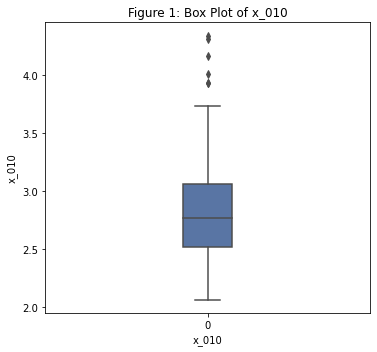

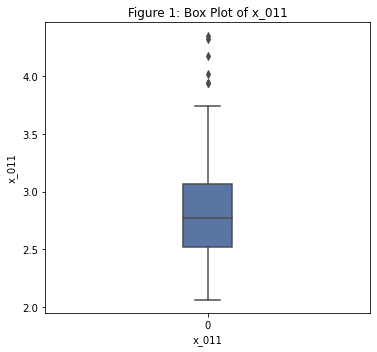

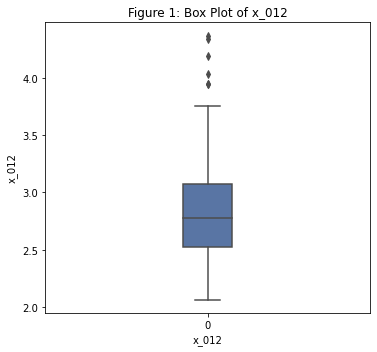

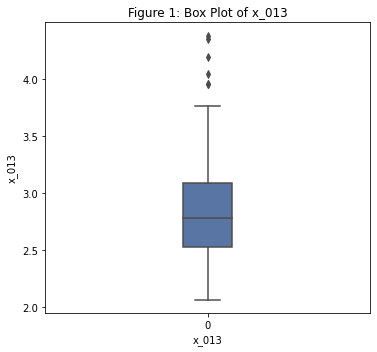

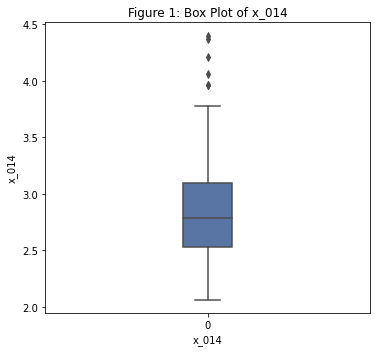

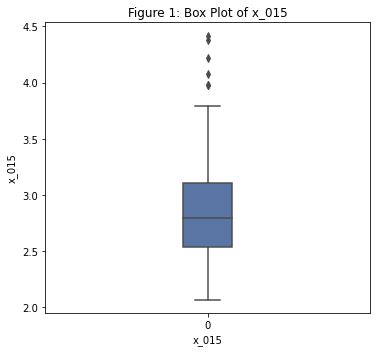

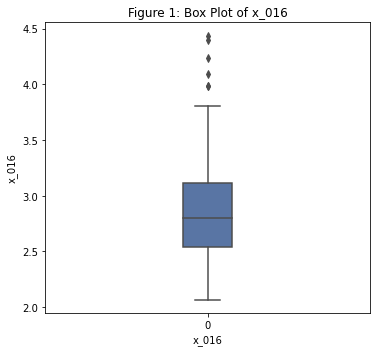

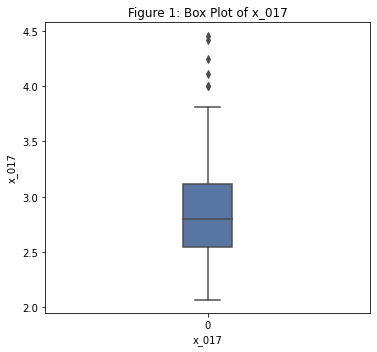

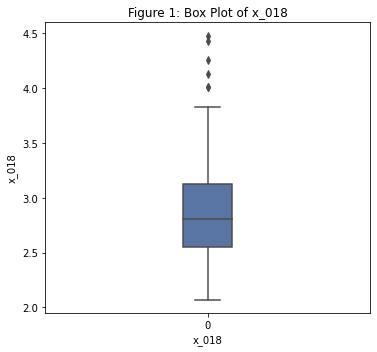

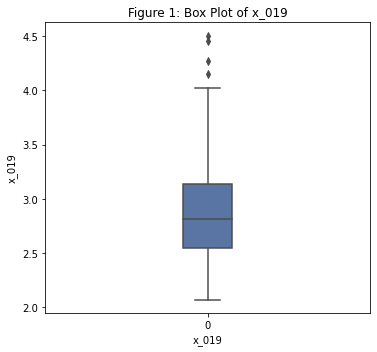

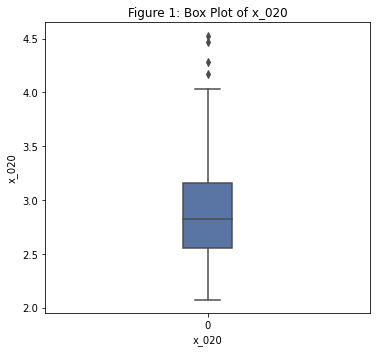

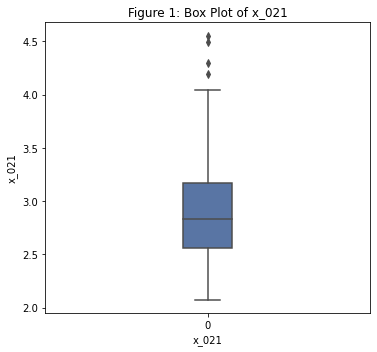

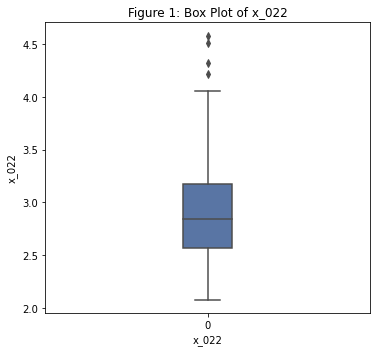

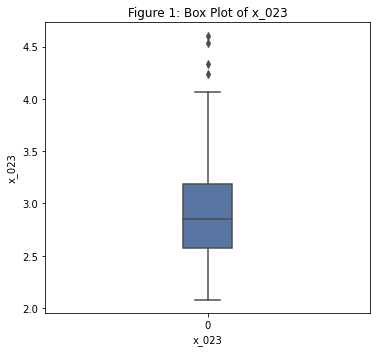

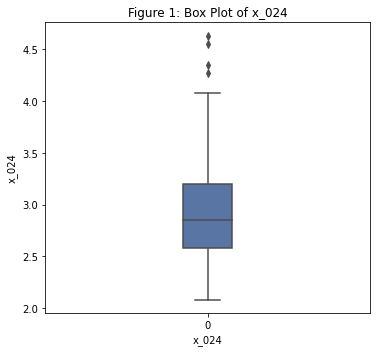

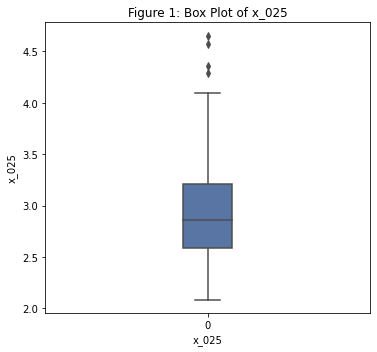

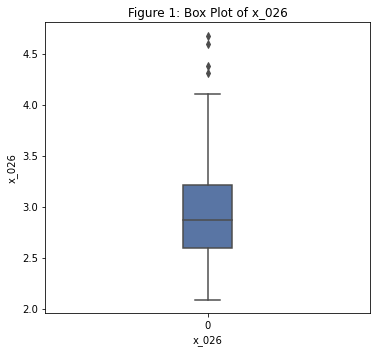

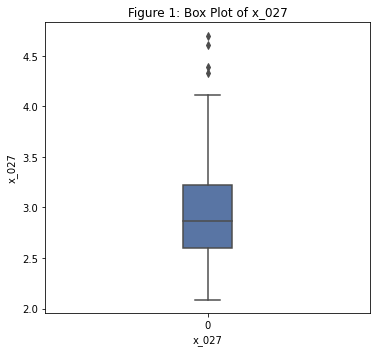

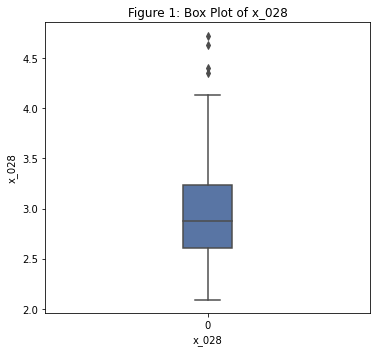

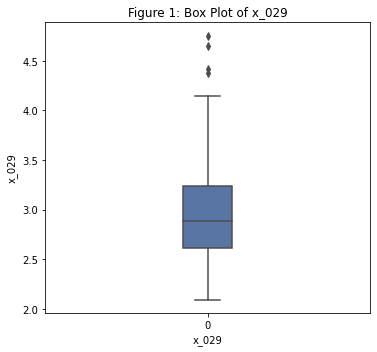

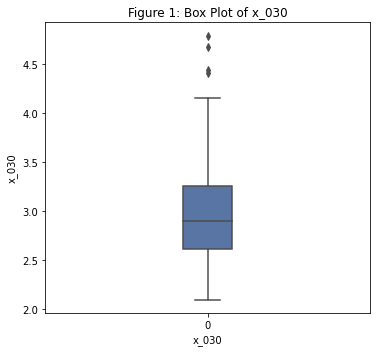

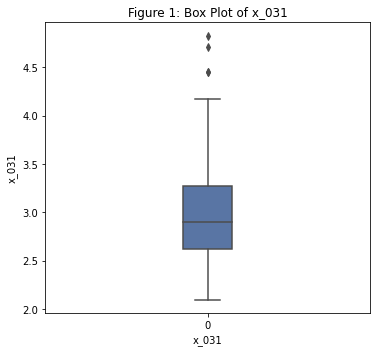

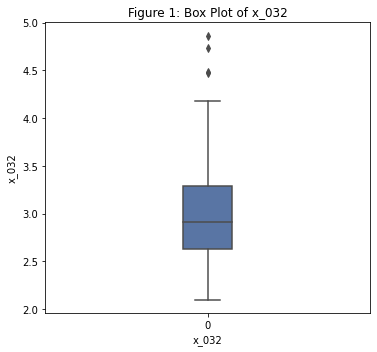

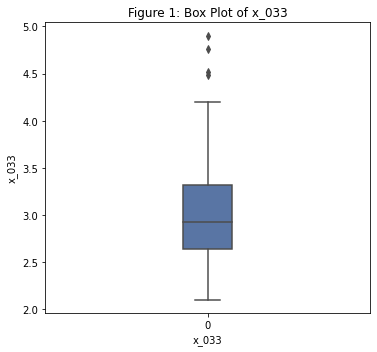

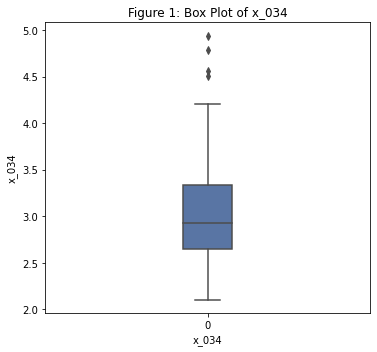

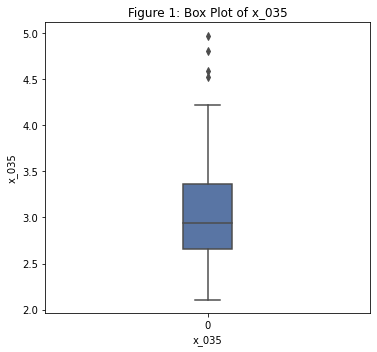

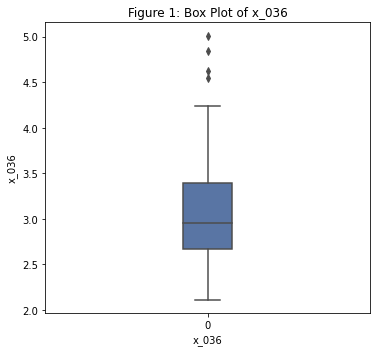

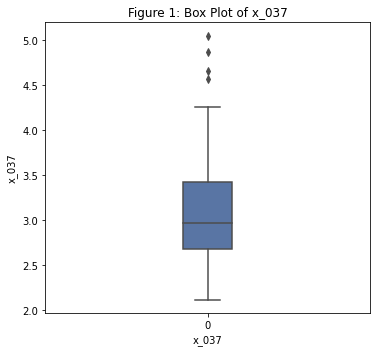

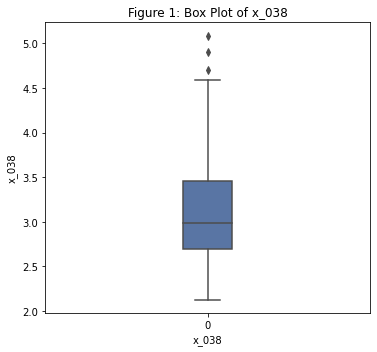

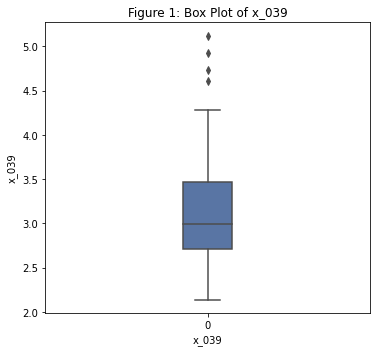

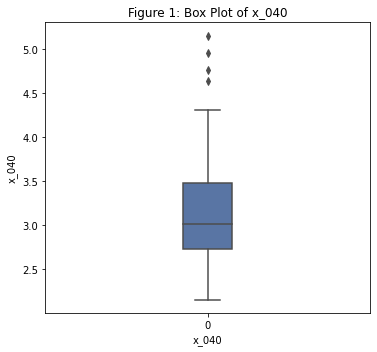

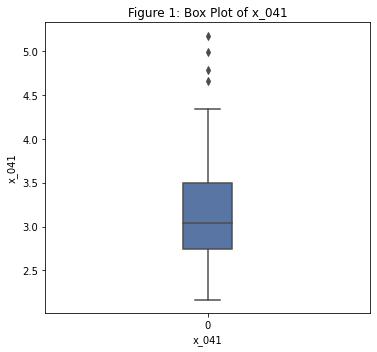

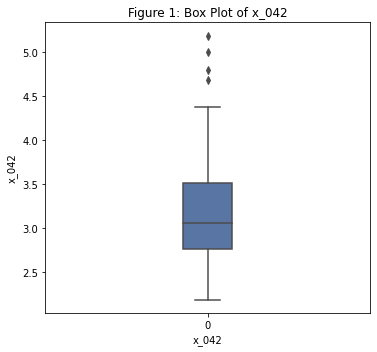

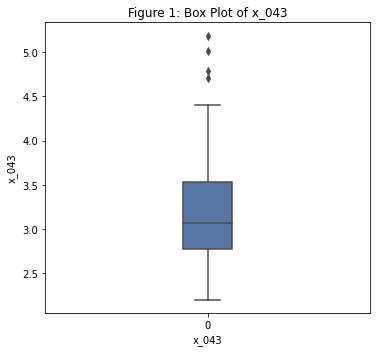

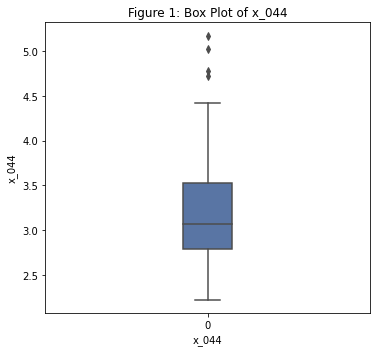

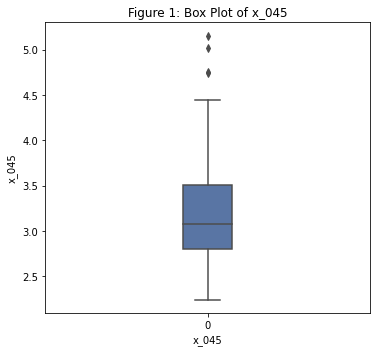

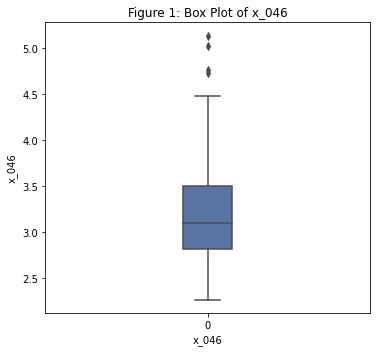

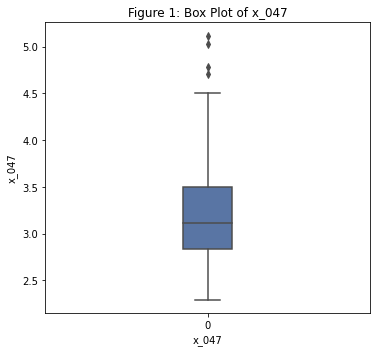

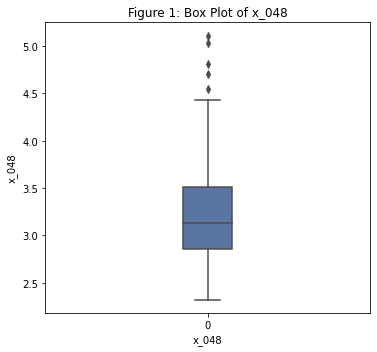

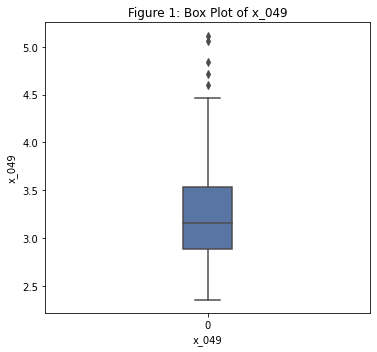

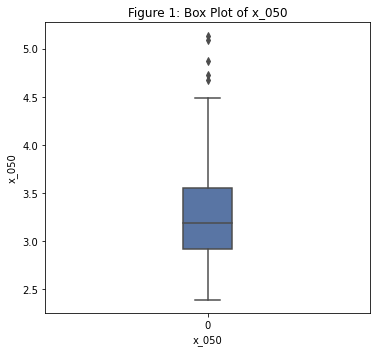

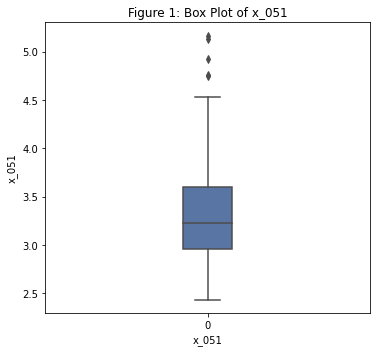

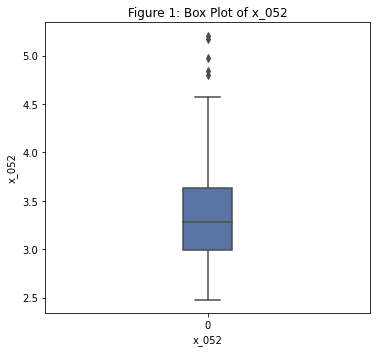

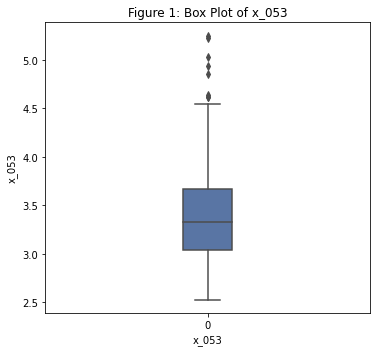

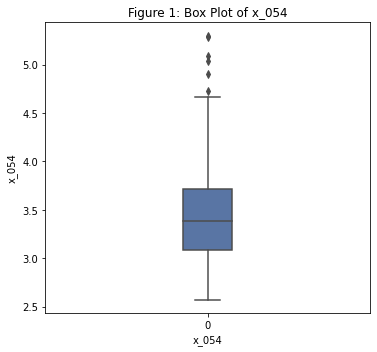

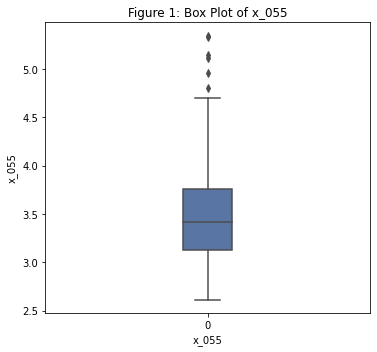

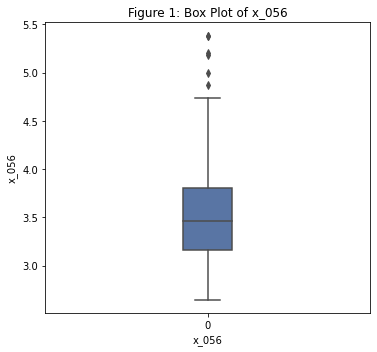

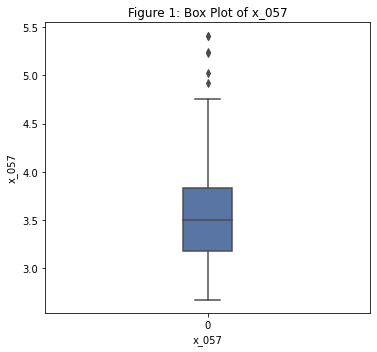

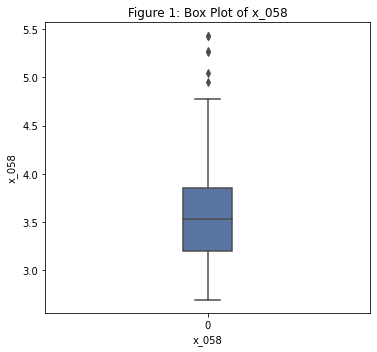

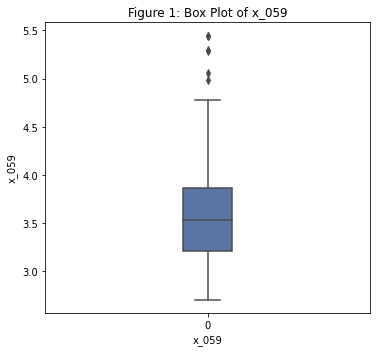

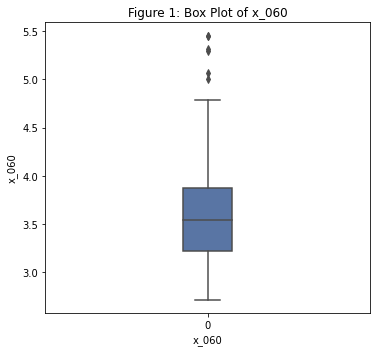

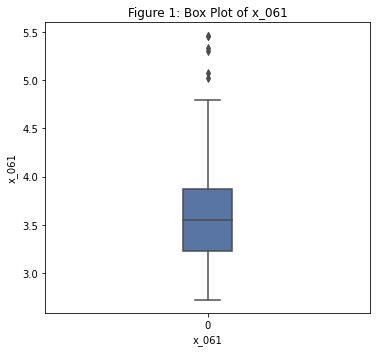

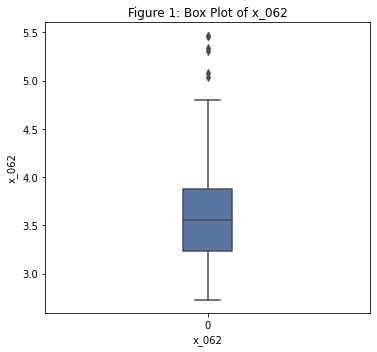

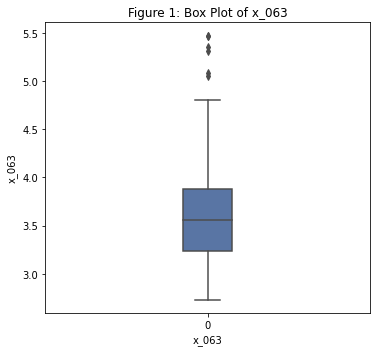

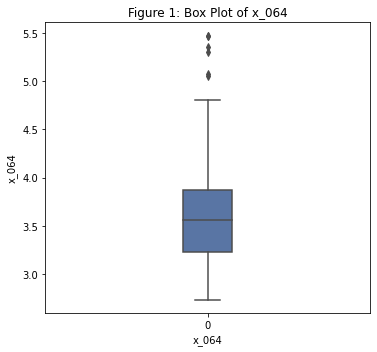

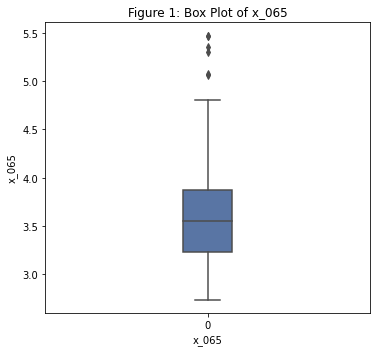

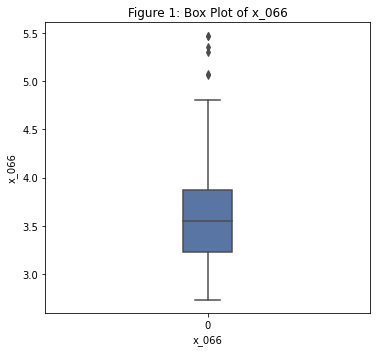

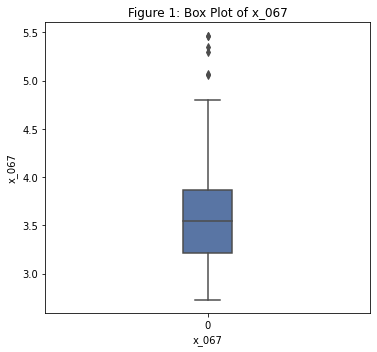

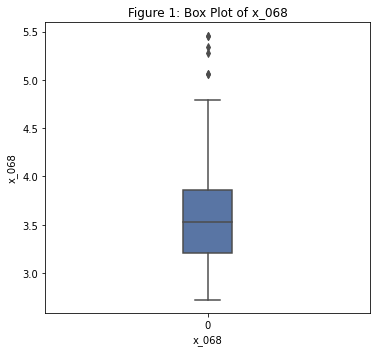

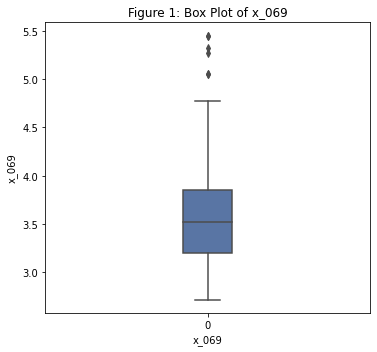

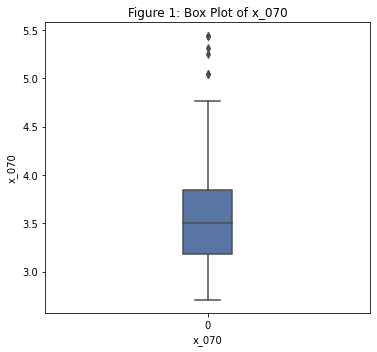

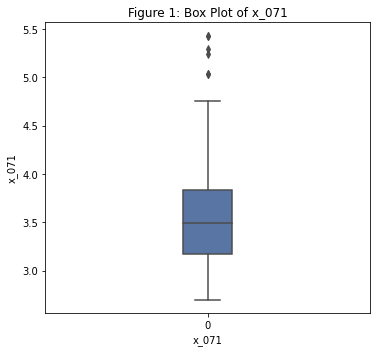

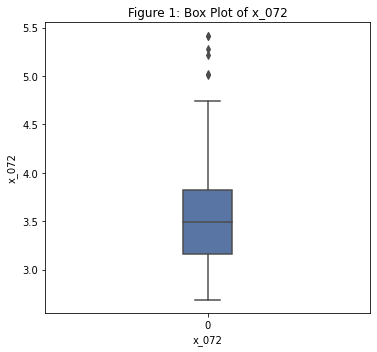

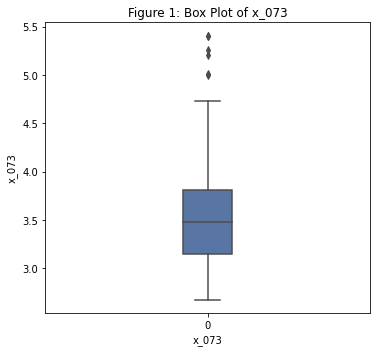

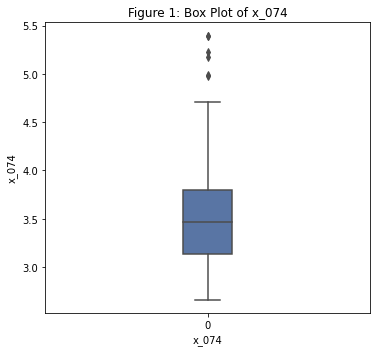

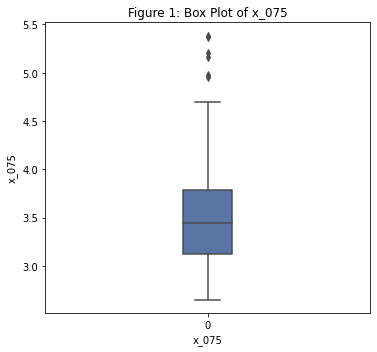

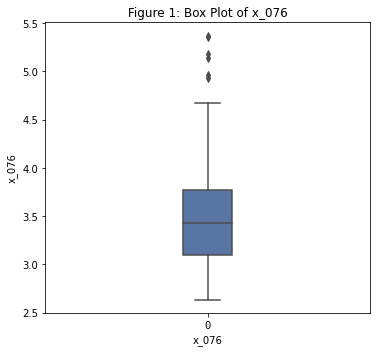

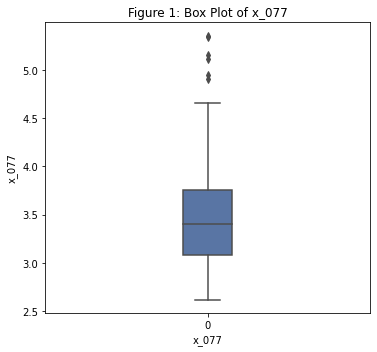

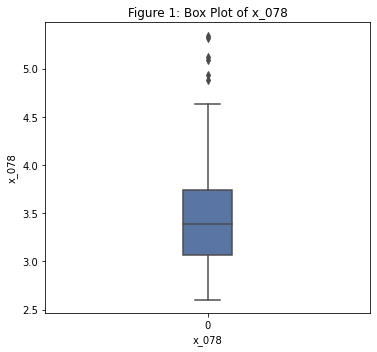

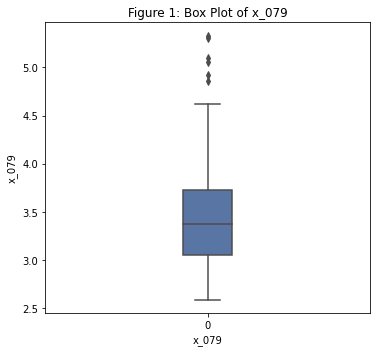

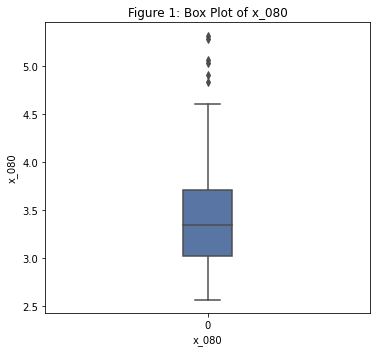

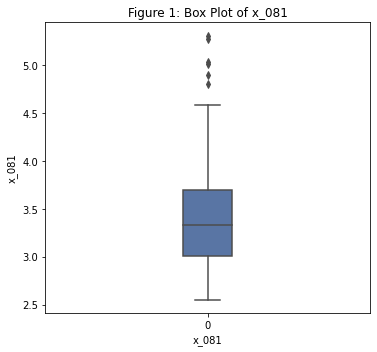

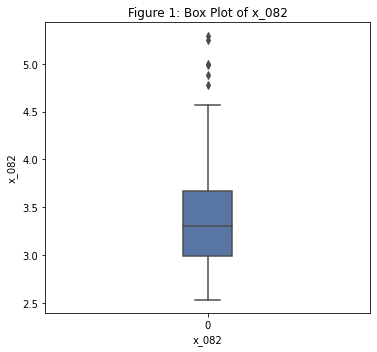

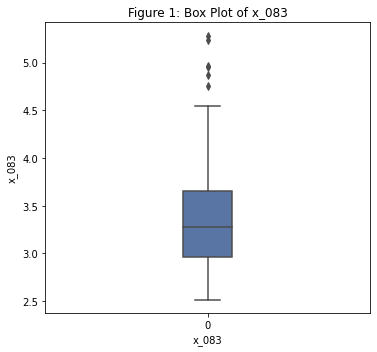

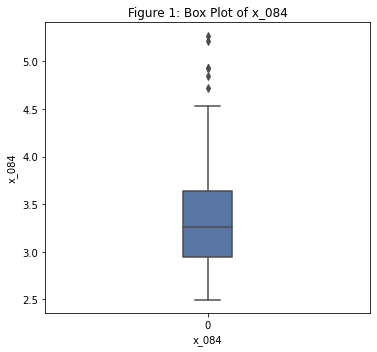

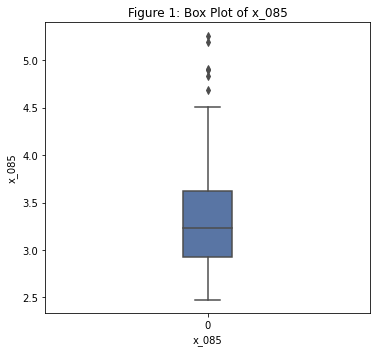

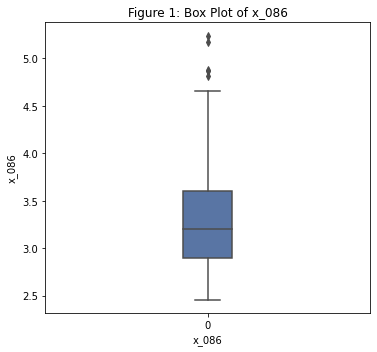

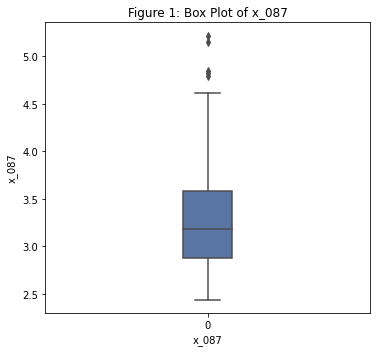

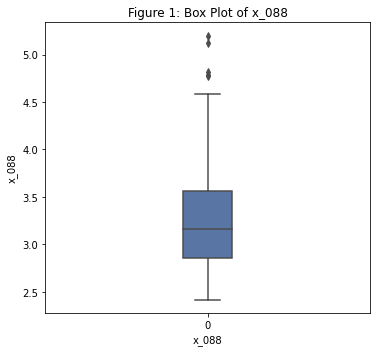

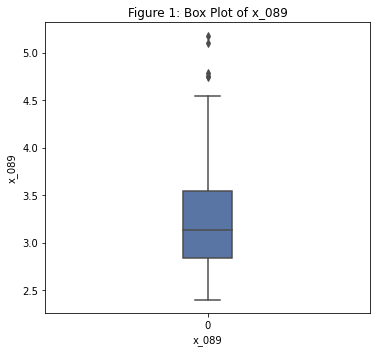

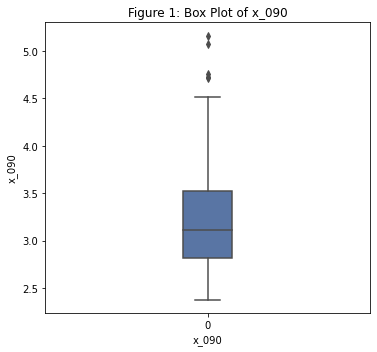

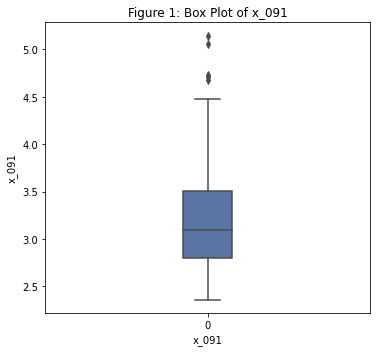

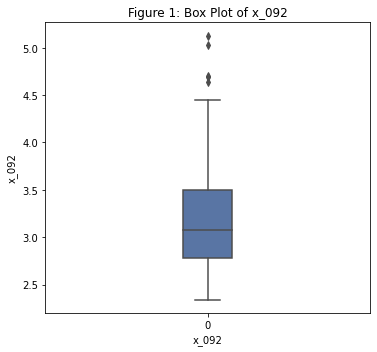

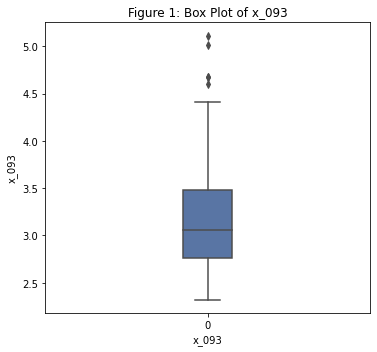

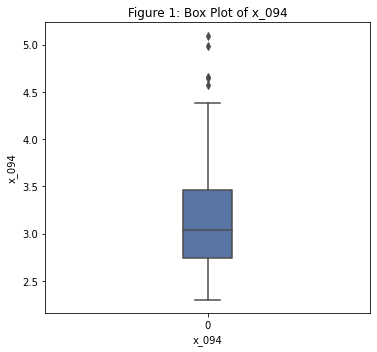

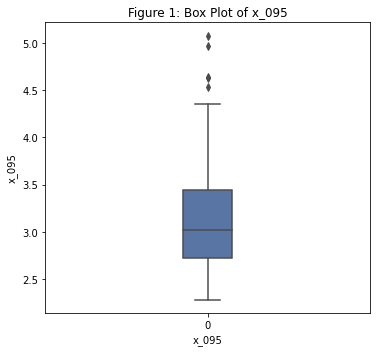

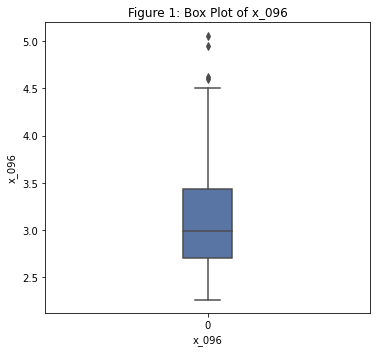

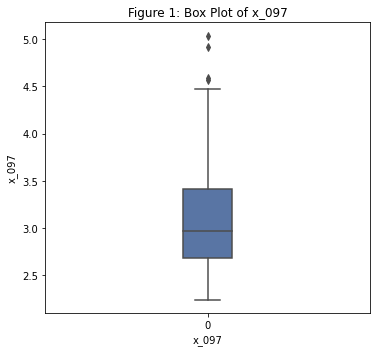

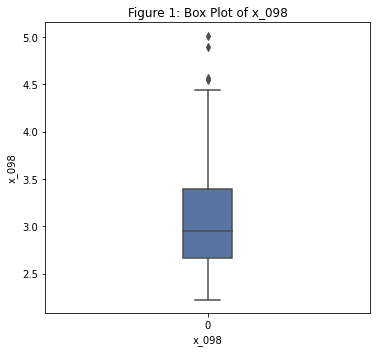

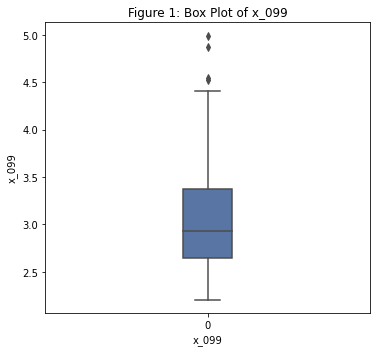

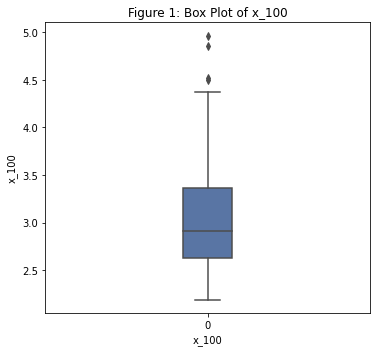

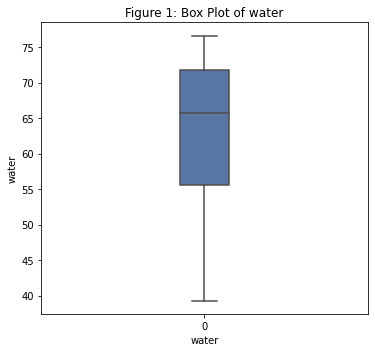

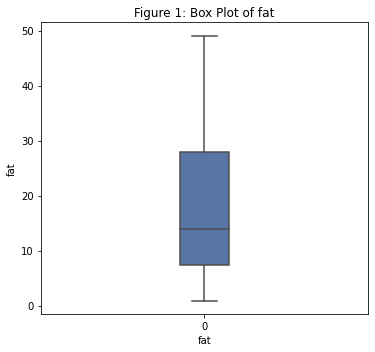

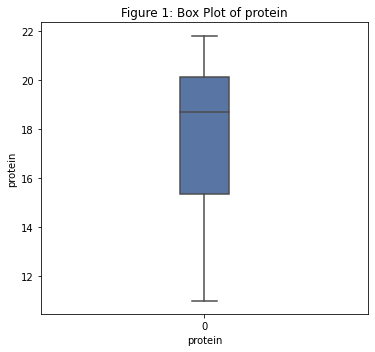

In [ ]:
#Here we obtain the boxplot for the variables to check for the outliers of the data.
data=meat.columns
data
value=data[0:103]
value
for i in value:
  fig=plt.figure(figsize=(10,5))
  ax=fig.add_subplot(122)
  sns.boxplot(data=meat[i],palette='deep',width=0.15,ax=ax)
  ax.set_title("Figure 1: Box Plot of "+i)
  ax.set_xlabel(i)
  ax.set_ylabel(i)
  plt.tight_layout()
  plt.show()

Thus, from the above boxplots for each variable in (Figure 1) it is observed that there does exists some outliers in the independent variable but not many outliers exists in the data. Hence we can go for further analysis for the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Water Content')

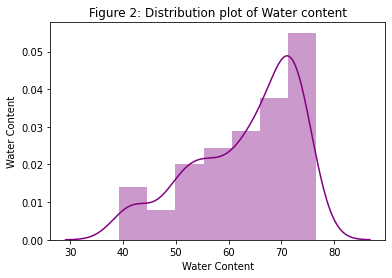

In [ ]:
#Distribution plot for Water in meat sample
sns.distplot(meat['water'], color = 'purple')
plt.title('Figure 2: Distribution plot of Water content')
plt.xlabel('Water Content')
plt.ylabel('Water Content')

Thus, from the above distribution plot (Figure 2) it is observed that the data of water content in meat sample is negatively skewed it is not perfectly normaly distributed but it can be scaled.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Fat Content')

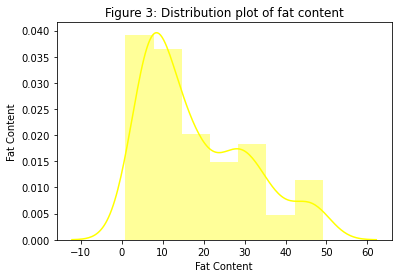

In [ ]:
#Distribution plot for fat content in meat sample
sns.distplot(meat['fat'], color = 'yellow')
plt.title('Figure 3: Distribution plot of fat content')
plt.xlabel('Fat Content')
plt.ylabel('Fat Content')

Thus, from the above distribution plot (Figure 3) it is observed that the data of fat content in meat sample is positively skewed it is not perfectly normaly distributed but it can be scaled.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Protein Content')

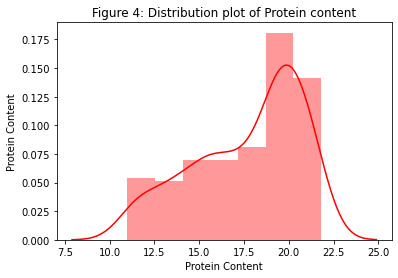

In [ ]:
#Distribution plot for protien content in meat sample
sns.distplot(meat['protein'], color = 'red')
plt.title('Figure 4: Distribution plot of Protein content')
plt.xlabel('Protein Content')
plt.ylabel('Protein Content')

Thus, from the above distribution plot (Figure 4) it is observed that the data of protein content in meat sample is negatively skewed it is not perfectly normaly distributed but it can be scaled.

**ANALYSIS**

In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=meat.drop(['water','fat','protein'],axis=1)

#Extracting the variable y i.e. dependent variable.
y=meat['fat']

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-pack

Text(0.5, 1.0, 'Fat')

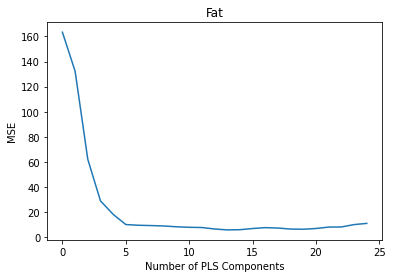

In [ ]:
#Fitting the PLS model to this data.
#Define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

#Calculating MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

#Calculating MSE using cross-validation, adding one component at a time
for i in np.arange(1, 25):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#Plotting test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Fat')

From the plot we can see that the test MSE decreases by adding in 14 PLS components, yet it begins to increase as we add more than 14 PLS components.

In [ ]:
#Splitting the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#Calculating RMSE
pls = PLSRegression(n_components=14)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))


3.383709273118545

**CONCLUSION**

We can see that the test RMSE turns out to be 3.38. This is the average deviation between the predicted value for fat and the observed value for fat for the observations in the testing set. Since MSE = 3.38 is a smaller vaue which indicates good accuracy of the model.